In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import warnings
import math
from scipy.misc import derivative
from scipy.optimize import differential_evolution
from matplotlib import pyplot as plt
from sympy import diff, symbols, cos, sin
from scipy import linalg
from scipy import stats
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier

In [4]:
from scipy.optimize import minimize
%matplotlib inline

Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [5]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [103]:
# raitings

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [7]:
def find_cos_metr(x,y):
    x_s = x * x
    y_s = y * y
    xy = x * y
    len_x = math.sqrt(sum(x_s))
    len_y = math.sqrt(sum(y_s))
    return (sum(xy)) / (len_x * len_y) 

cos_metr = np.zeros((10,10))
for i in range(len(raitings)):
    for j in range(i+1, len(raitings)):
        cos_metr[i][j] = cos_metr[j][i] = find_cos_metr(raitings[i], raitings[j])
        
list(zip(range(len(cos_metr)), np.argmax(cos_metr, axis=0)))
    

[(0, 8),
 (1, 4),
 (2, 9),
 (3, 9),
 (4, 8),
 (5, 9),
 (6, 3),
 (7, 5),
 (8, 0),
 (9, 2)]

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

применю pca
1. Есть набор векторов в N-мерном пространстве. Хотим упростить, понизив размерность
2. Вычисляем матрицу их попарных скалярных произведений. Она симметрична.
3. Все её собственные значения положительны. Берём n наибольших.
4. Проецируем на подпространство, порождённое n собственными векторами
5. Получаем n-мерное представление данных, отражающее большую часть вариативности

Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [8]:
def f(x):
    return math.tan(math.sin(x) + math.cos(2 * x + 3)) ** 2

print('derivative 1: ', derivative(f, 1.0, dx=1e-6, n = 1))

derivative 1:  55.3859176464222


Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [9]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [67]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [68]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

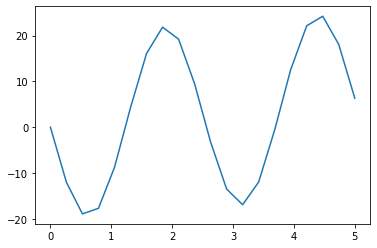

In [69]:
plt.plot(x, fx)
plt.show()

In [70]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [74]:
# bounds = [(-500, 500), (-500, 500)]
# bounds = [(-100, 100), (-100, 100)]
bounds = [(-10, 10), (-10, 10)]
# bounds = [(-1, 1), (-1, 1)]
result = differential_evolution(error, 
                                bounds,
                                recombination=0.9,
                                mutation=0.1,
                                seed=42)
result

     fun: 1.5099609944613235e-06
     jac: array([143.00094238, 502.76545123])
 message: 'Optimization terminated successfully.'
    nfev: 483
     nit: 13
 success: True
       x: array([ 3. , -2.5])

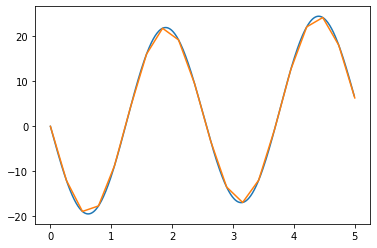

In [76]:
x_ = np.arange(0,5,0.01)
fx_ = [ f(i, 3, -2.5) for i in x_]
plt.plot(x_, fx_)
plt.plot(x, fx)
plt.show()

Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [111]:
xk = np.arange(10)
pk = (0.1, 0.2, 0.05, 0.1, 0.05, 0.05, 0.2, 0.05, 0.19, 0.01)
rv = stats.rv_discrete(values=(xk, pk))

In [112]:
n = 50
samples_count = 1000
a = []

for number in range(samples_count):
    sample = rv.rvs(size=n)
    a = np.append(a, sample.mean())

Text(0.5, 0, '$x$')

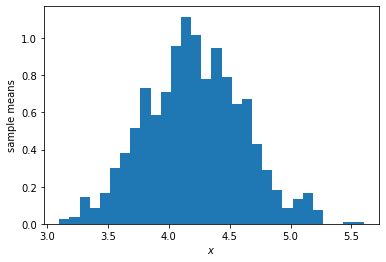

In [113]:
plt.hist(a, bins = 30, density=True)
plt.ylabel('sample means')
plt.xlabel('$x$')

Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

In [94]:
m = np.array([[1, 4],[1,1]])
print(m)

[[1 4]
 [1 1]]


In [98]:
a, U = linalg.eig(m)
print("Eigenvalues:")
print(np.array(a))
print("\nEigenvectors:")
print(U)

Eigenvalues:
[ 3.+0.j -1.+0.j]

Eigenvectors:
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
